# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

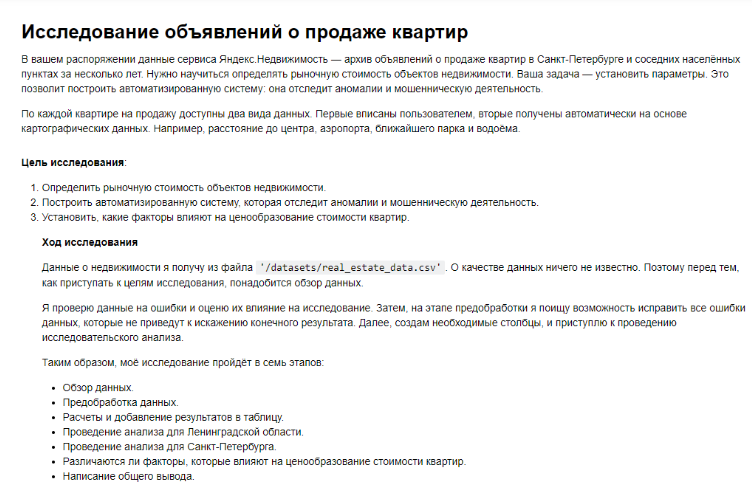

### Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
import seaborn as sns

In [3]:
data = pd.read_csv("C:\\Users\\rusla\\Desktop\\Проекты для GIT\\Датасеты\\data_2.csv", sep = '\t')
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [5]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


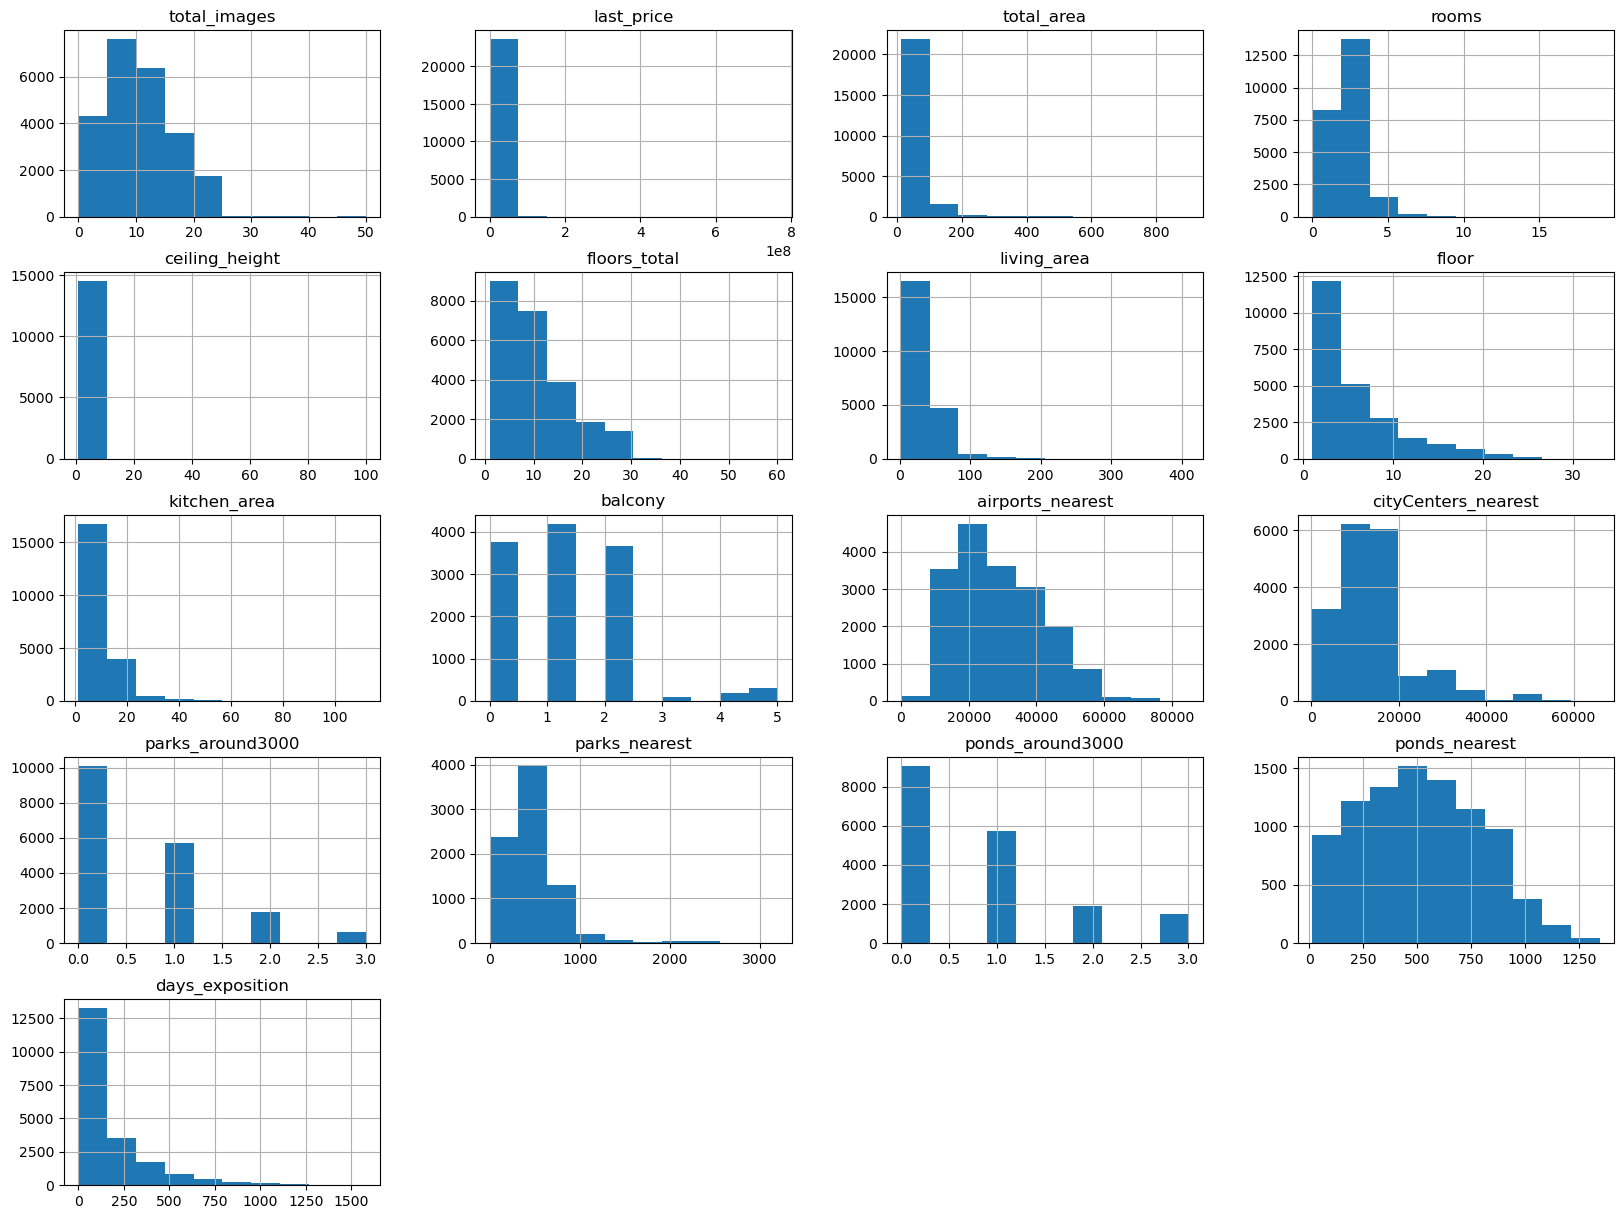

In [6]:
data.hist(figsize = (20, 15))
plt.show()


### Выполните предобработку данных

Столбцы котоорые не будем заполнять:  
**parks_around3000** - данные не заполнены, пропускаем
**parks_nearest** - данные не заполнены, пропускаем  
**ponds_around3000** - данные не заполнены, пропускаем  
**ponds_nearest** - данные не заполнены, пропускаем  
**locality_name** - заменим пропуски на "Нет данных"  
**total_floors** - пропущенно в районе 80 значений их заполнять не будем т.к нет точной информации о доме, если бы был id дома, то можно было бы найти максимальное значение по дому или же заполненый столбец total_floors и заполнить пропуски по этому же дому, если бы данные были, но такой информации нет.  
**days_exposition** - сделка может висеть на сайте, но по факту она была закрыта не на нём - оставляем как есть  
Cтолбцы которые заполняем:  
**ceiling_height** - попробуем два метода - 1 заполним средним значение по всем населённым пункам заранее заменив аномалии пример 27м, 2 - создадим столбец с категорией населённого пункта город, пгт, поселок, деревня и нет данных о локации и заполним средним по населённому пункту  
**kitchen_area** - скорее всего данные не заполнены там, где объект относится к студии, заполнять среднем или медианой будет ошибочно т.к объект может находится в поселке с площадью 1000кв и кухней 100кв или в городе с площадью 80кв и кухней 19кв. Студии чаще всего находятся в крупных городах посмотрим на количество студий в СПБ и от этого будем уже отталкиваться.  
**balcony** - пропуски заполним пропуски на 0 - нет балкона
**airports_nearest** - из предположений отсортировать по населённому  пункту и заполнить среднем расстоянием от населённого пункта до аэропорта.       
**cityCenters_nearest** - аналогично с аэропортом.   









In [7]:
(data.isna().sum() / len(data)*100)

total_images             0.000000
last_price               0.000000
total_area               0.000000
first_day_exposition     0.000000
rooms                    0.000000
ceiling_height          38.799105
floors_total             0.362885
living_area              8.029875
floor                    0.000000
is_apartment            88.290645
studio                   0.000000
open_plan                0.000000
kitchen_area             9.612220
balcony                 48.605426
locality_name            0.206760
airports_nearest        23.384953
cityCenters_nearest     23.287902
parks_around3000        23.283683
parks_nearest           65.909954
ponds_around3000        23.283683
ponds_nearest           61.559559
days_exposition         13.422507
dtype: float64

In [8]:
check_kitch = data.query('rooms == 0 & locality_name == "Санкт-Петербург"')[['kitchen_area', 'living_area']].isnull().sum()

In [9]:
#В данных 23699 строк, у нас же в столбце is_apartment всего 2775, мы не сможем корректно заполнить их
#При предобработке пропустим их
data['is_apartment'].value_counts()

is_apartment
False    2725
True       50
Name: count, dtype: int64

In [10]:
data['balcony'].fillna(0, inplace=True)
data['balcony'] = data['balcony'].astype(int)
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d', errors='coerce')
data.loc[data['ceiling_height'] > 11, 'ceiling_height'] = data.loc[data['ceiling_height'] > 11, 'ceiling_height'] / 10
data['locality_name'].fillna('Нет данных', inplace = True) 
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')
data['floors_total'] = pd.to_numeric(data['floors_total'], errors='coerce')

Заменяем пустые значения в столбце balcony, на 0 т.к балкон либо есть, либо его нет и ихменили значения столбца на целые значения  
Меняем форматы даты т.к часы, минуты и секунды нам не нужны и они везде одни и теже (00:00:00)  
Я заменил пропуски в столбце ceiling_height на среднюю высотку потолка по нашим данным и убрал анамалии в виде потолок 27м,25м таких потолков быть не может и поэтому я делю высоту потолков больше чем 11м на 10т.к они вполне реальны в каком нибудь загородном "особняке". Также заполняю пустые значением "Нет данных" столбец locality_name, для того, чтобы избежать неявных дубликатов я заменил 'е' на "ё" т.к были населенные пункты (поселок Эдово, посёлок Эдово), заменили значеня столбца floors_total на целые

In [11]:
#Вариант не точный, скорее нужно сгрупировать по насленному пункту
mean_height_total = data['ceiling_height'].mean()
data['ceiling_height'] = data['ceiling_height'].fillna(mean_height_total)
data['ceiling_height'] = data['ceiling_height'].round(decimals=2)


In [12]:
data.pivot_table(index = 'locality_name', values = 'last_price', aggfunc = 'sum')

,last_price
locality_name,
Бокситогорск,1.353900e+07
Волосово,7.120000e+07
Волхов,1.931299e+08
Всеволожск,1.508049e+09
Выборг,7.704830e+08
...,...
село Путилово,4.050000e+06
село Рождествено,5.700000e+06
село Русско-Высоцкое,2.420000e+07


In [13]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'поселок Шушары', 'городской поселок Янино-1',
       'поселок Парголово', 'поселок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина',
       'деревня Федоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'поселок Металлострой',
       'поселок городского типа Лебяжье',
       'поселок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'поселок городского типа Ефимовский', 'поселок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'поселок Новый Свет

In [14]:
(data.isna().sum() / len(data)*100)

total_images              0.000000
last_price                0.000000
total_area                0.000000
first_day_exposition    100.000000
rooms                     0.000000
ceiling_height            0.000000
floors_total              0.362885
living_area               8.029875
floor                     0.000000
is_apartment             88.290645
studio                    0.000000
open_plan                 0.000000
kitchen_area              9.612220
balcony                   0.000000
locality_name             0.000000
airports_nearest         23.384953
cityCenters_nearest      23.287902
parks_around3000         23.283683
parks_nearest            65.909954
ponds_around3000         23.283683
ponds_nearest            61.559559
days_exposition          13.422507
dtype: float64

Без доп.иформации не получится узнать кол-во этажей в доме и жилую площадь(основный параметр) на данном этапе.
Предположение если узнаем ср стоимость за кв метр в зависимости от других параметров,
то сможем предположить примерную жил.площадь

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  0 non-null      datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          2775 non-null   object        
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

### Добавьте в таблицу новые столбцы

In [17]:
def new_local(locality_name):
    if 'городс' in locality_name:
         return 'ПГТ'
    elif 'деревня' in locality_name:
        return 'Деревня'
    elif 'поселок' in locality_name:
        return 'Поселок'
    elif 'Нет данных' in locality_name:
        return 'Нет категории'
    return 'Город'
data['type_locality'] = data['locality_name'].apply(new_local)

In [18]:
data['type_locality'].unique()

array(['Город', 'Поселок', 'ПГТ', 'Деревня', 'Нет категории'],
      dtype=object)

In [19]:
last_price_for_local = data.pivot_table(index = 'type_locality', values = 'last_price', aggfunc = 'sum')

Добавим в таблицу цену за 1 кв.м

In [20]:
data['cost_for_square'] = (data['last_price']/data['total_area']).round(2)

In [21]:
conditions = [
    (data['floor'] == data['floors_total']),
    (data['floor'] == 1),
    (data['floor'] != data['floors_total']) & (data['floor'] != 1)
]

choices = ['Последний этаж', 'Первый этаж', 'Другой']

data['floor_type'] = np.select(conditions, choices, default='Other')


In [22]:
data['first_year'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d').dt.year
data['first_month'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d').dt.month
data['first_day'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d').dt.day
data['day_of_week'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d').dt.dayofweek
data['range_to_centere_km'] = (data['cityCenters_nearest']/1000).round(0)
data['last_price'] = (data['last_price']/1000).round(0)

In [23]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,type_locality,cost_for_square,floor_type,first_year,first_month,first_day,day_of_week,range_to_centere_km
0,20,13000.0,108.00,NaT,3,2.70,16.0,51.00,8,NaN,...,755.0,NaN,Город,120370.37,Другой,NaN,NaN,NaN,NaN,16.0
1,7,3350.0,40.40,NaT,1,2.73,11.0,18.60,1,NaN,...,NaN,81.0,Поселок,82920.79,Первый этаж,NaN,NaN,NaN,NaN,19.0
2,10,5196.0,56.00,NaT,2,2.73,5.0,34.30,4,NaN,...,574.0,558.0,Город,92785.71,Другой,NaN,NaN,NaN,NaN,14.0
3,0,64900.0,159.00,NaT,3,2.73,14.0,NaN,9,NaN,...,234.0,424.0,Город,408176.10,Другой,NaN,NaN,NaN,NaN,7.0
4,2,10000.0,100.00,NaT,2,3.03,14.0,32.00,13,NaN,...,48.0,121.0,Город,100000.00,Другой,NaN,NaN,NaN,NaN,8.0
5,10,2890.0,30.40,NaT,1,2.73,12.0,14.40,5,NaN,...,NaN,55.0,ПГТ,95065.79,Другой,NaN,NaN,NaN,NaN,NaN
6,6,3700.0,37.30,NaT,1,2.73,26.0,10.60,6,NaN,...,NaN,155.0,Поселок,99195.71,Другой,NaN,NaN,NaN,NaN,19.0
7,5,7915.0,71.60,NaT,2,2.73,24.0,NaN,22,NaN,...,NaN,NaN,Город,110544.69,Другой,NaN,NaN,NaN,NaN,12.0
8,20,2900.0,33.16,NaT,1,2.73,27.0,15.43,26,NaN,...,NaN,189.0,Поселок,87454.76,Другой,NaN,NaN,NaN,NaN,NaN
9,18,5400.0,61.00,NaT,3,2.50,9.0,43.60,7,NaN,...,NaN,289.0,Город,88524.59,Другой,NaN,NaN,NaN,NaN,15.0


Были добавлены столбцы:
**first_year** - год публикации объявления  
**first_mobth** - месяц публикации объявления  
**firts_data** - день публикации объявления 
**floor_type** - Другой - этажи отличные от первого и последнего, первый этаж, последний этаж  
**type_locality** - Город, деревня, ПГТ, поселок, пропуски заменены на нет данных, а также в столбце locality_name убраны неявные дубликаты с буквами "е" и "ё"  
Также заполнили пропуски в столбце с высостой потолков на среднее значение



### Проведите исследовательский анализ данных

Начнем с изучения нужных нам параметров методом describe

In [24]:
data[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe()

,total_area,last_price,rooms,ceiling_height
count,23699.000000,23699.000000,23699.000000,23699.000000
mean,60.348651,6541.548800,2.070636,2.729228
std,35.654083,10887.012837,1.078405,0.239424
min,12.000000,12.000000,0.000000,1.000000
25%,40.000000,3400.000000,1.000000,2.600000
50%,52.000000,4650.000000,2.000000,2.730000
75%,69.900000,6800.000000,3.000000,2.730000
max,900.000000,763000.000000,19.000000,10.300000


Площадь варьируется от 12 до 900, гле 900 возможно, какой то загородный дом с 19 комнатами, либо общежитие  
Цена же от 12 тыс до 763 млн  
Число комнат от 0 до 19
Высота потолков от 1м до 10, при обработке я предположил, что это может быть какой то загородный дом с высостой потолков 10,3 м, все последующие были разделены на 10

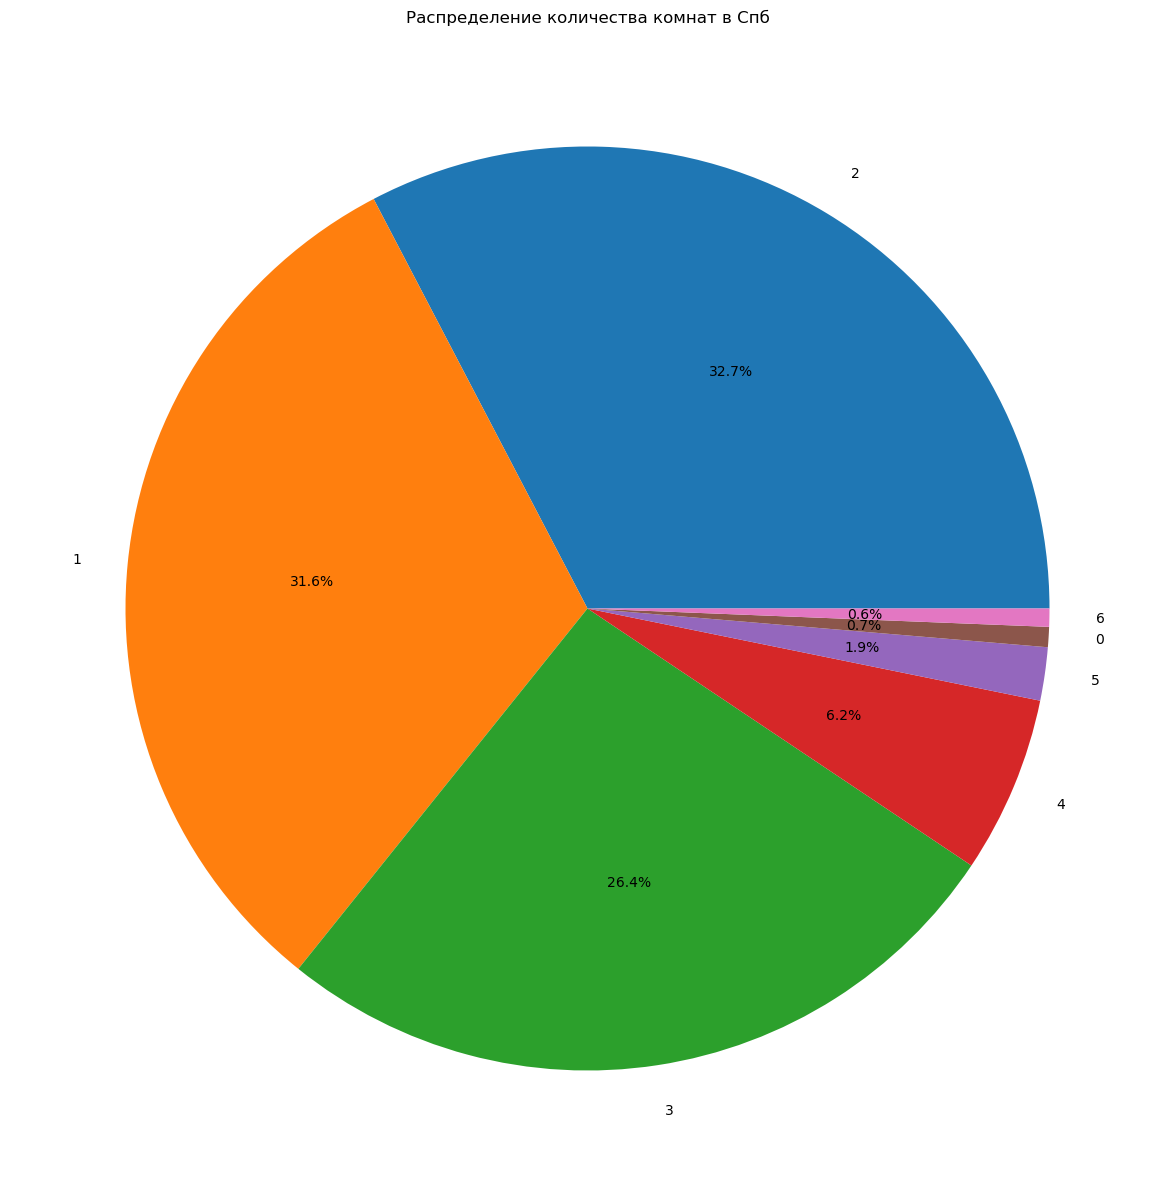

In [25]:
spb_lock = data[data['locality_name'] == 'Санкт-Петербург']
filtered_data = spb_lock[(spb_lock['rooms'] >= 0) & (spb_lock['rooms'] <= 6)]
room_counts = filtered_data['rooms'].value_counts()
plt.figure(figsize=(15,15))
plt.pie(room_counts, labels=room_counts.index, autopct='%1.1f%%')
plt.title('Распределение количества комнат в Спб')
plt.show()

Большую долю занимают квартиры с 1,2,3 комнатами в Спб

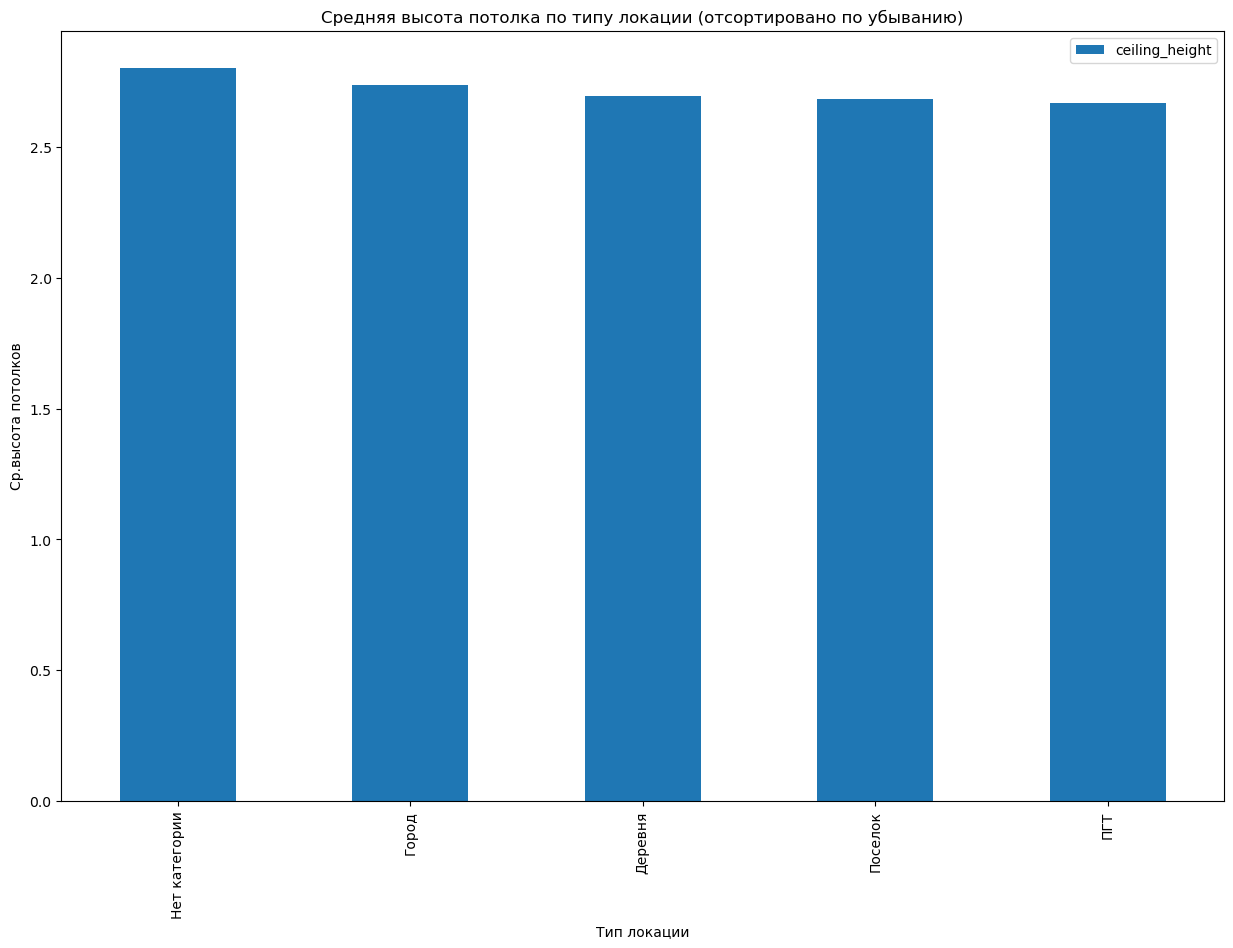

In [26]:
pivot_table_local = data.pivot_table(index='type_locality', values='ceiling_height', aggfunc='mean')
sorted_pivot_table = pivot_table_local.sort_values(by='ceiling_height', ascending=False)
sorted_pivot_table.plot(kind='bar', figsize=(15, 10))
plt.xlabel('Тип локации')
plt.ylabel('Ср.высота потолков')
plt.title('Средняя высота потолка по типу локации (отсортировано по убыванию)')
plt.show()

Если не брать в учёт значения где нет названия местности, то самые высокие потолки в городе, самые низкие в ПГТ

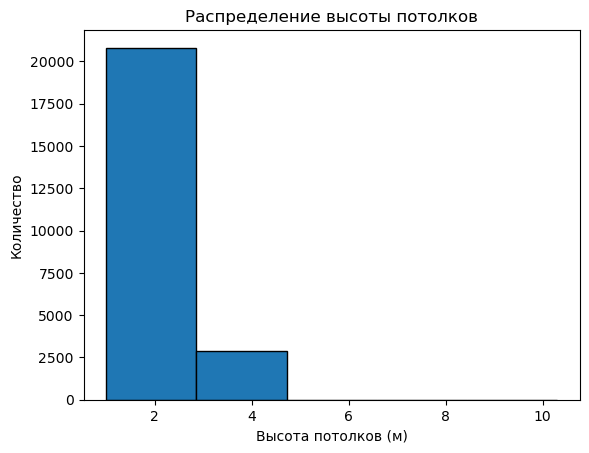

In [27]:
plt.hist(data['ceiling_height'], bins=5, edgecolor='black')

plt.xlabel('Высота потолков (м)')
plt.ylabel('Количество')
plt.title('Распределение высоты потолков')

plt.show()

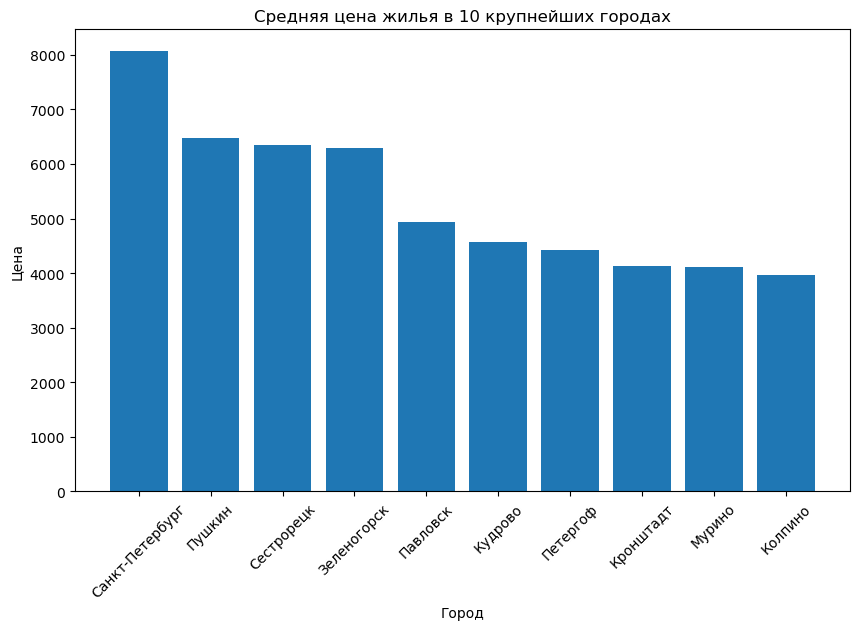

In [28]:
#Построим динамику последней цены по типу локации
city_din = data[data['type_locality'] == 'Город']
top_cities = city_din.groupby('locality_name')['last_price'].mean().nlargest(10)

plt.figure(figsize=(10, 6))

plt.bar(top_cities.index, top_cities.values)
plt.xlabel('Город')
plt.ylabel('Цена')
plt.title('Средняя цена жилья в 10 крупнейших городах')
plt.xticks(rotation=45)
plt.show()

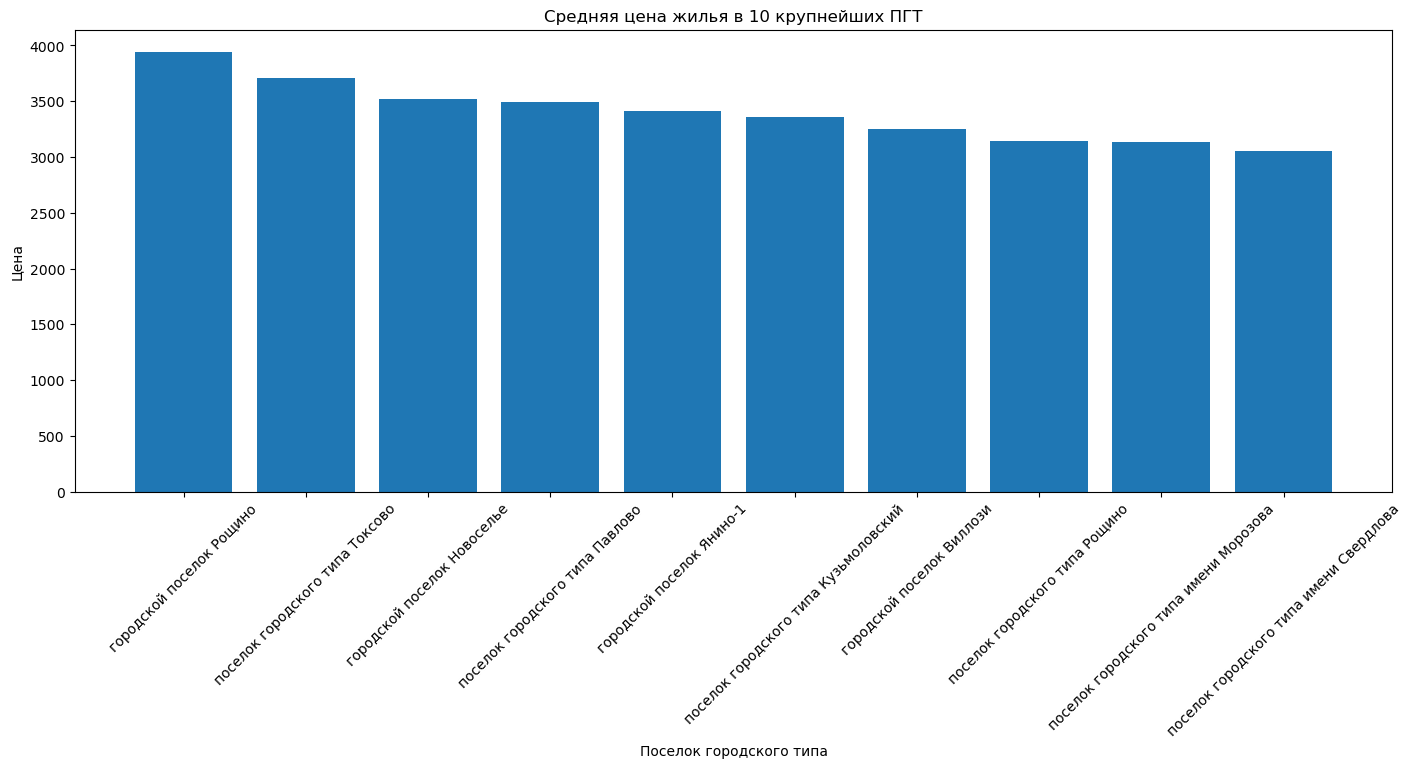

In [29]:
pgt_din = data[data['type_locality'] == 'ПГТ']
top_cities = pgt_din.groupby('locality_name')['last_price'].mean().nlargest(10)

plt.figure(figsize=(17, 6))

plt.bar(top_cities.index, top_cities.values)
plt.xlabel('Поселок городского типа')
plt.ylabel('Цена')
plt.title('Средняя цена жилья в 10 крупнейших ПГТ')
plt.xticks(rotation=45)
plt.show()

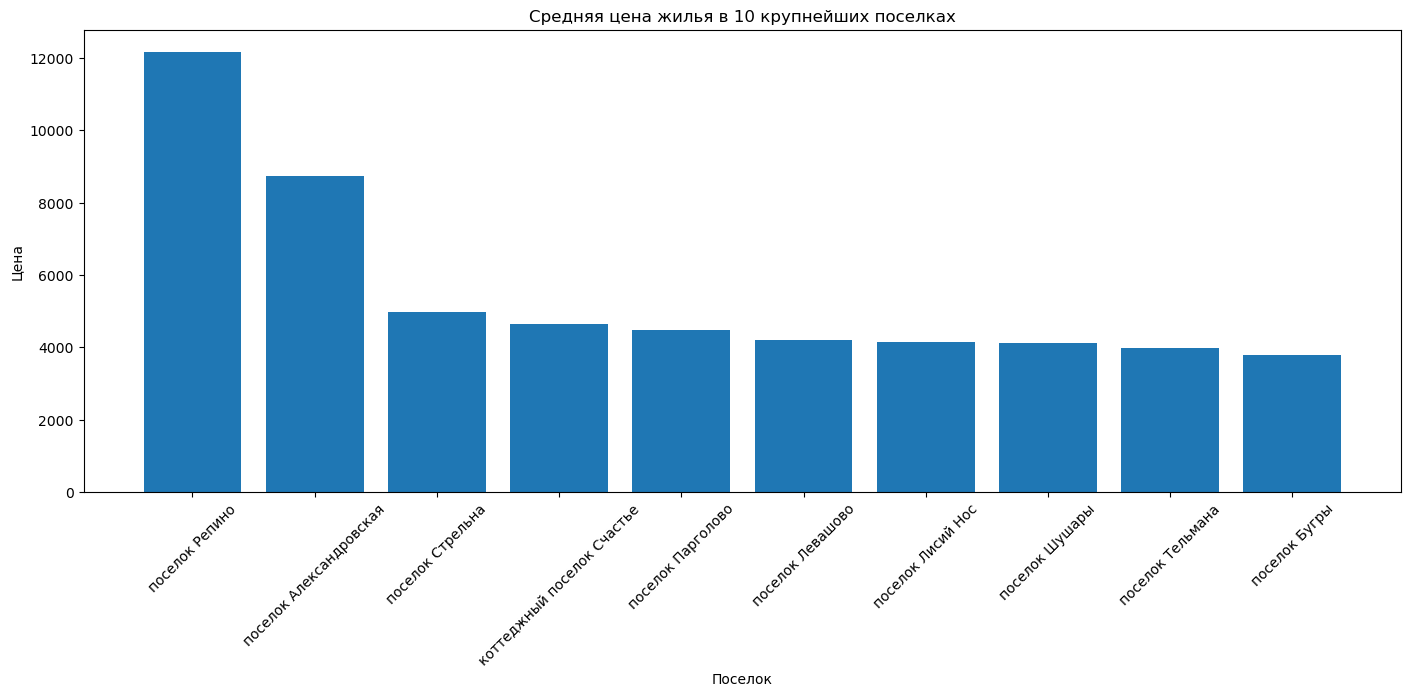

In [30]:
pos_din = data[data['type_locality'] == 'Поселок']
top_cities = pos_din.groupby('locality_name')['last_price'].mean().nlargest(10)

plt.figure(figsize=(17, 6))

plt.bar(top_cities.index, top_cities.values)
plt.xlabel('Поселок')
plt.ylabel('Цена')
plt.title('Средняя цена жилья в 10 крупнейших поселках')
plt.xticks(rotation=45)
plt.show()

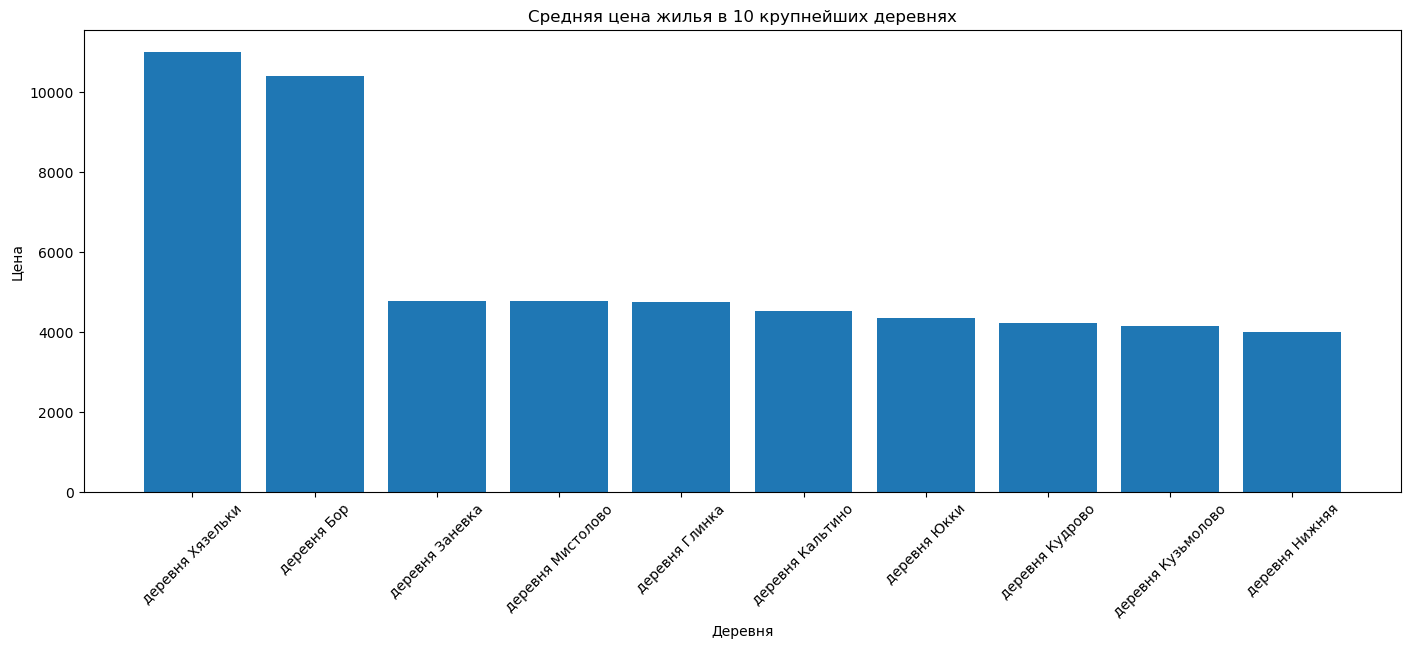

In [31]:
country_din = data[data['type_locality'] == 'Деревня']
top_cities = country_din.groupby('locality_name')['last_price'].mean().nlargest(10)

plt.figure(figsize=(17, 6))

plt.bar(top_cities.index, top_cities.values)
plt.xlabel('Деревня')
plt.ylabel('Цена')
plt.title('Средняя цена жилья в 10 крупнейших деревнях')
plt.xticks(rotation=45)
plt.show()

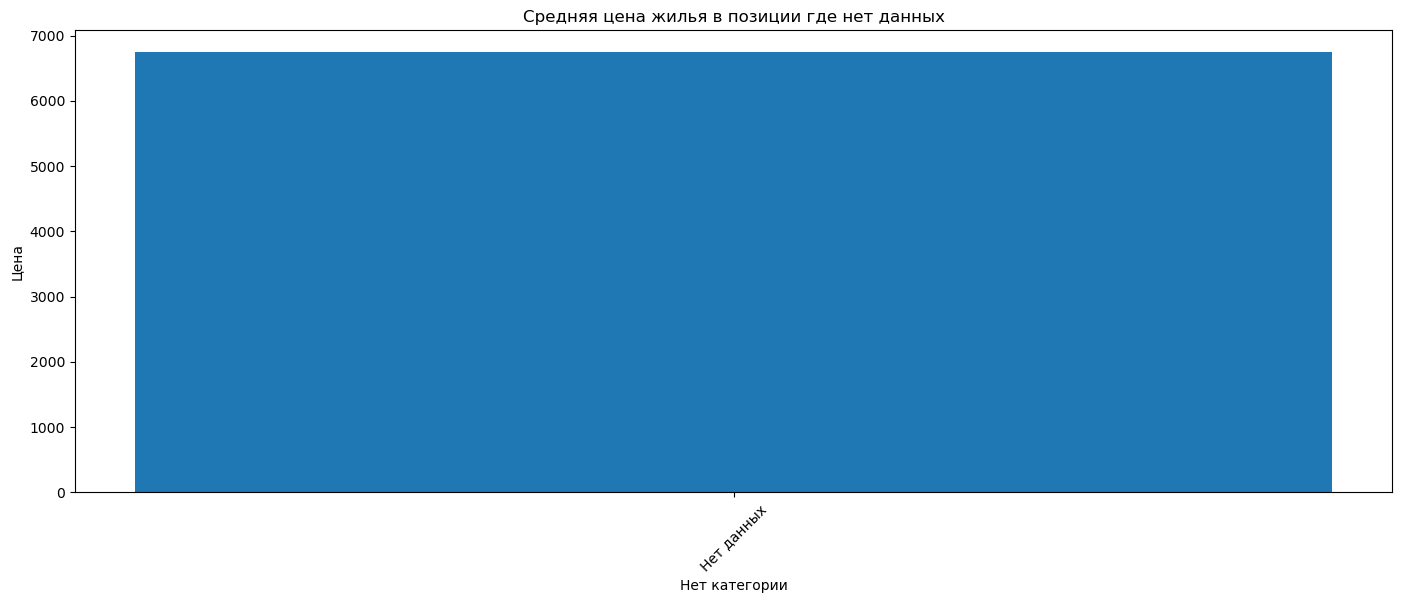

In [32]:
non_din = data[data['type_locality'] == 'Нет категории']
top_cities = non_din.groupby('locality_name')['last_price'].mean().nlargest(10)

plt.figure(figsize=(17, 6))

plt.bar(top_cities.index, top_cities.values)
plt.xlabel('Нет категории')
plt.ylabel('Цена')
plt.title('Средняя цена жилья в позиции где нет данных')
plt.xticks(rotation=45)
plt.show()

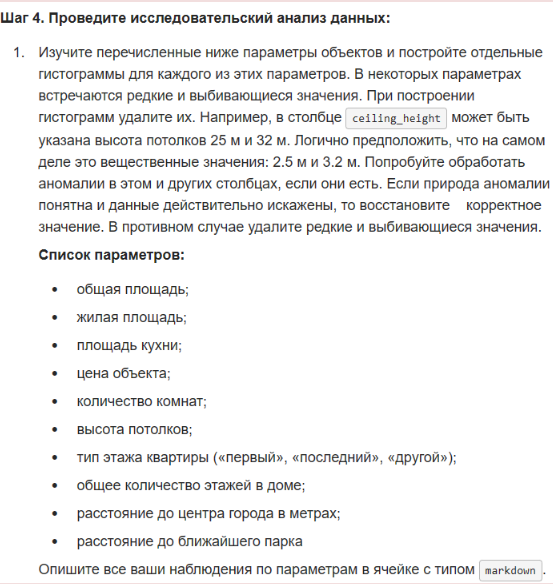

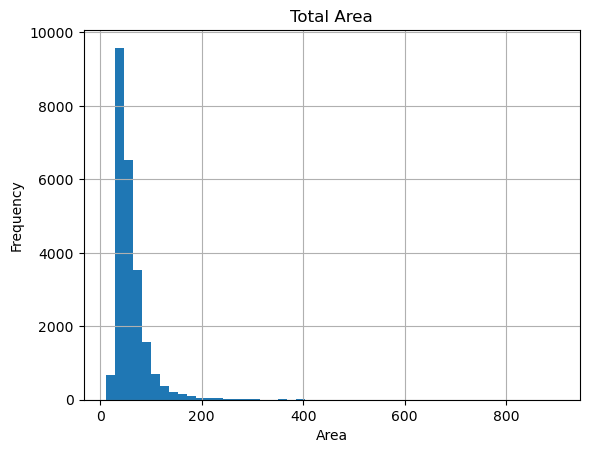

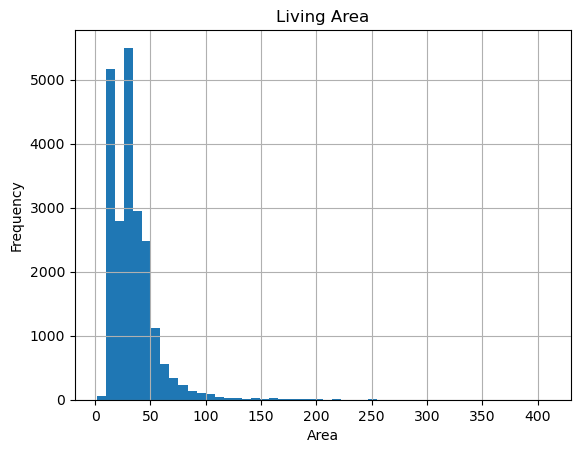

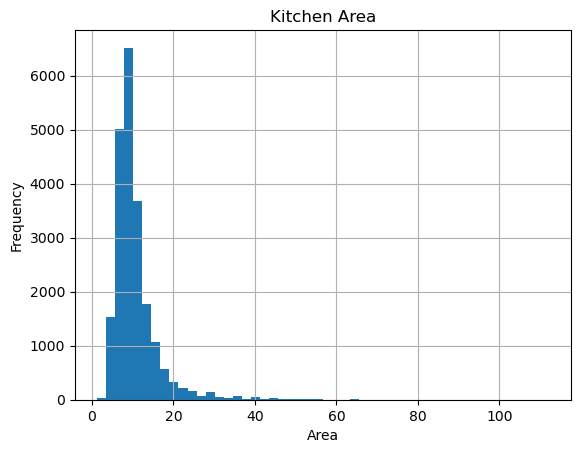

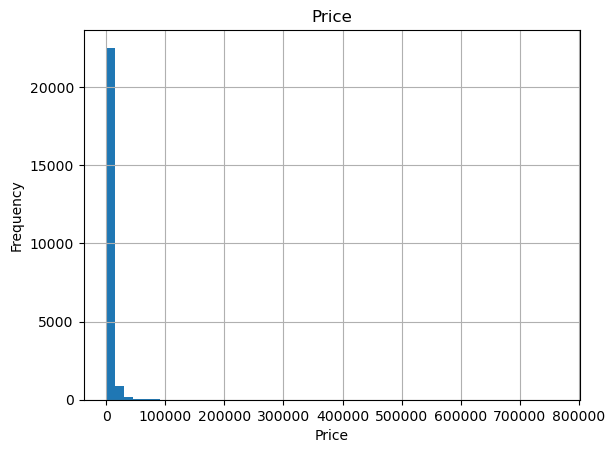

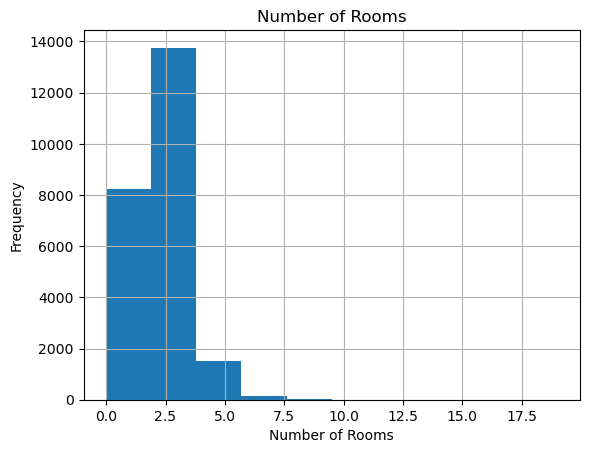

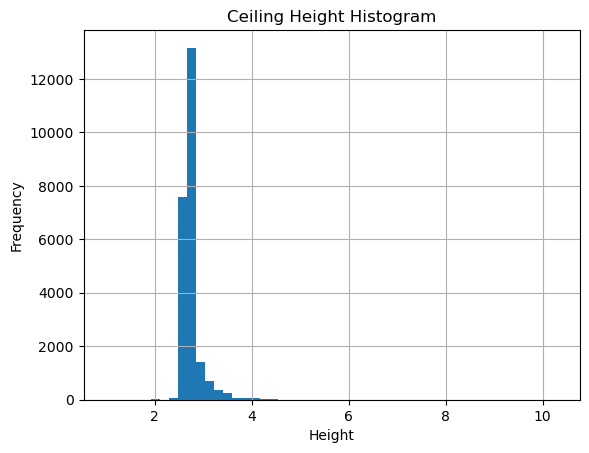

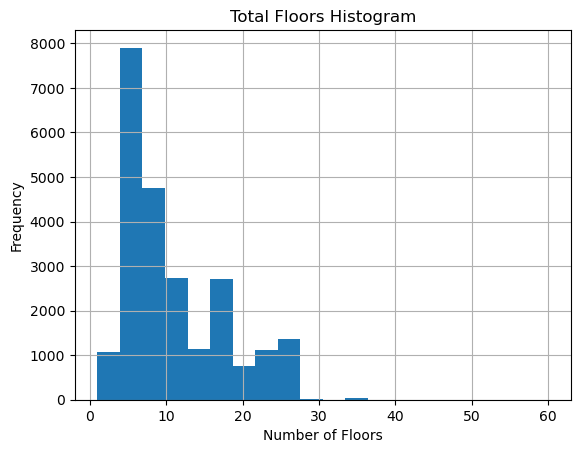

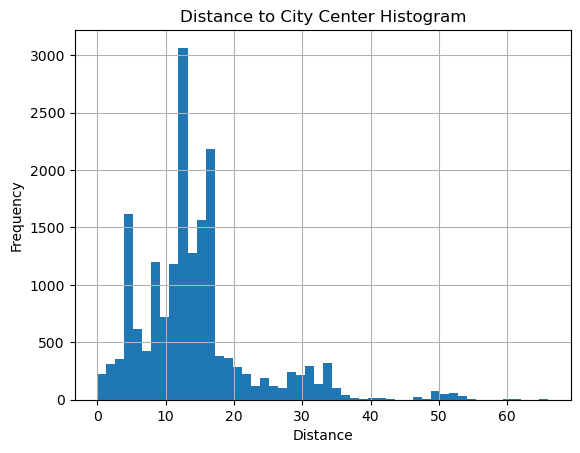

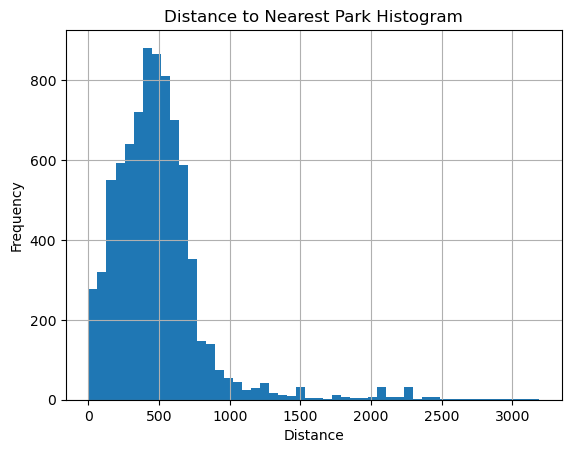

In [33]:
# общая площадь
data['total_area'].hist(bins=50)
plt.title('Total Area')
plt.xlabel('Area')
plt.ylabel('Frequency')
plt.show()

# жилая площадь
data['living_area'].hist(bins=50)
plt.title('Living Area')
plt.xlabel('Area')
plt.ylabel('Frequency')
plt.show()

# площадь кухни
data['kitchen_area'].hist(bins=50)
plt.title('Kitchen Area')
plt.xlabel('Area')
plt.ylabel('Frequency')
plt.show()

# цена объекта
data['last_price'].hist(bins=50)
plt.title('Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# количество комнат
data['rooms'].hist(bins=10)
plt.title('Number of Rooms')
plt.xlabel('Number of Rooms')
plt.ylabel('Frequency')
plt.show()

# высота потолков
data['ceiling_height'].hist(bins=50)
plt.title('Ceiling Height Histogram')
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.show()

# общее количество этажей в доме
data['floors_total'].hist(bins=20)
plt.title('Total Floors Histogram')
plt.xlabel('Number of Floors')
plt.ylabel('Frequency')
plt.show()

# расстояние до центра города в метрах
data['range_to_centere_km'].hist(bins=50)
plt.title('Distance to City Center Histogram')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.show()

# расстояние до ближайшего парка
data['parks_nearest'].hist(bins=50)
plt.title('Distance to Nearest Park Histogram')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.show()

<Axes: >

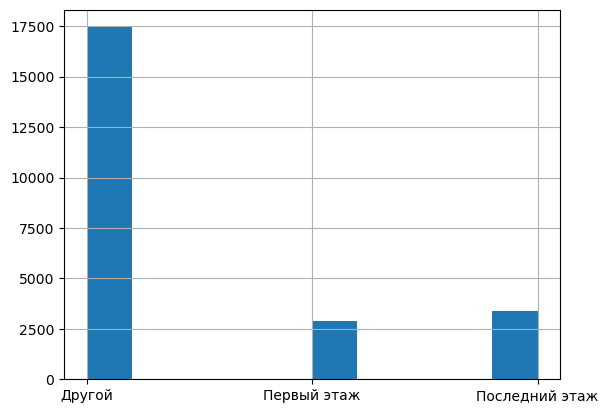

In [34]:
data['floor_type'].hist()

Общая площадь, жилая площадь, площадь кухни, цены объекта и количество комнат имеют нормальное распределение, что является ожидаемым для таких параметров.
Высота потолков имеет выбивающиеся значения, которые были обработаны путем деления на 10 для значений больше 11 метров.
Обнаружены аномалии в типе этажа квартиры, которые были заменены на "другой".
Расстояние до центра города и до ближайшего парка также имеют нормальное распределение, но есть небольшое количество аномальных или выбивающихся значений, которые могут потребовать дополнительной обработки.

In [35]:
rooms_by_area = data.pivot_table(index = 'rooms', values = 'total_area', aggfunc = ['mean', 'count'])
rooms_by_area.columns = ['mean', 'count']

In [36]:
median_days = data['days_exposition'].median()
mean_days = data['days_exposition'].mean()
print('Медиана:', median_days)
print('Среднее:', mean_days)

Медиана: 95.0
Среднее: 180.88863436982163


Среднее время продажи - полгода, 180 дней. Медианное - 95 дней.
3 месяца достаточно быстро.

<Axes: >

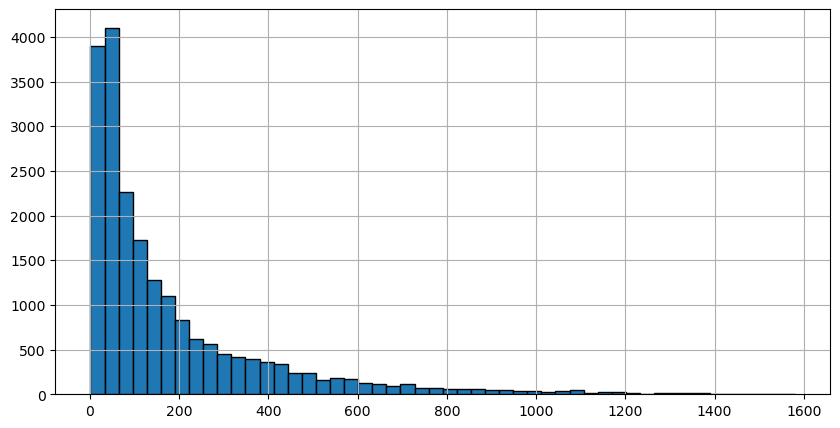

In [37]:
data['days_exposition'].hist(bins=50, figsize=(10,5), ec='black')

В основном квартиры продавались 40-60 дней, некоторые продавались до 1 года, с увеличением дней кол-во уменьшаается

<Axes: >

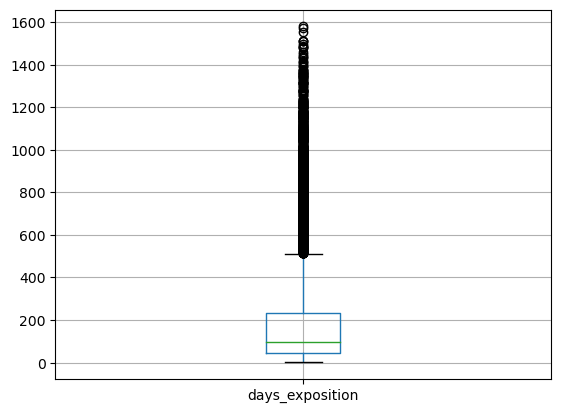

In [38]:
data.boxplot(column='days_exposition')

На мйо взгляд логичным будет ограничить в 550 дней, чтобы не попадались аномалии или же выбросы

<Axes: >

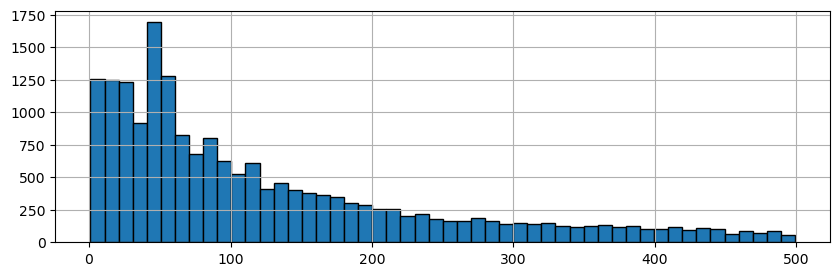

In [39]:
data.query('days_exposition < 500')['days_exposition'].hist(bins=50, figsize=(10,3), ec='black')

На графике есть странные данные, в районе 40-60 дней, думаю стоит "увеличить" график и рассмотреть их

<Axes: >

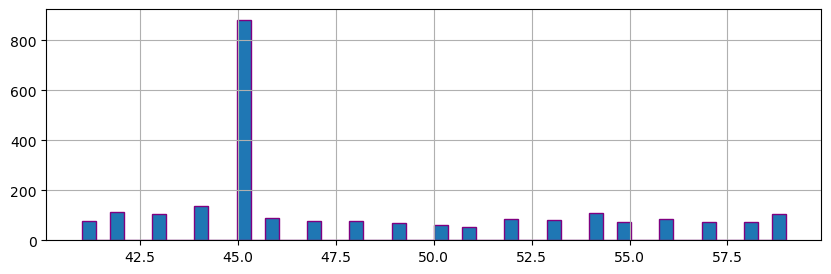

In [40]:
data.query('40 < days_exposition < 60')['days_exposition'].hist(bins=50, figsize=(10,3), ec='purple')


Правая граница не попала в выборку будем увеличивать с шагом в 6

<Axes: >

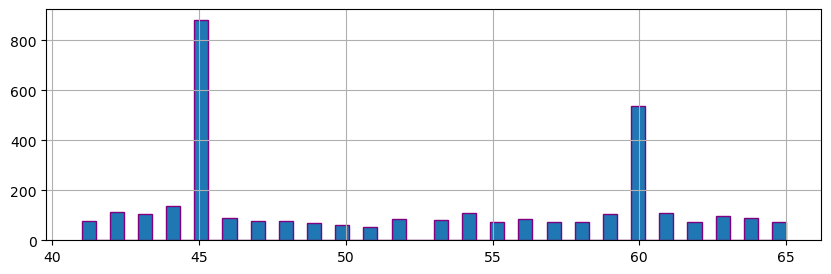

In [41]:
data.query('40 < days_exposition < 66')['days_exposition'].hist(bins=50, figsize=(10,3), ec='purple')

На мой взгляд все достаточно логично, скорее всего сделки закрывются раз в 45 дней или раз в 60 дней, поэтому мы и наблюдаем некие скачки

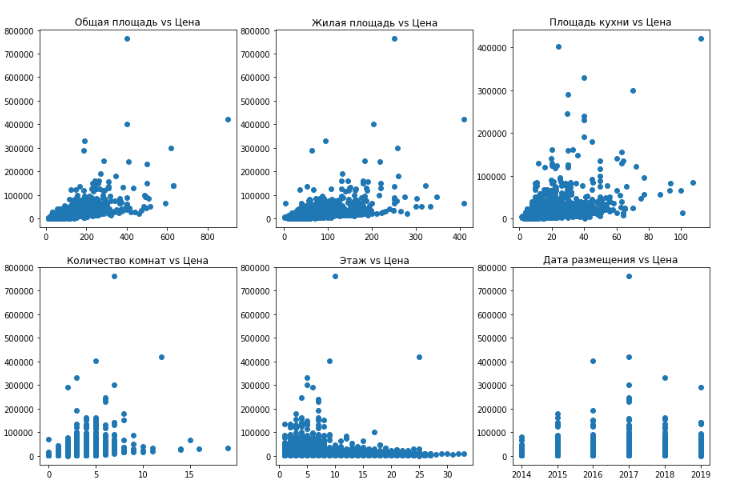

Я вывел графики зависимости различных параметров от цены, при пролощи основной массив приходится на площадь от 0 до 100 кв.м
При жилой площади аналогично с увеличением её цена выростает, если не учитывать значение 0 - нет кухни, то цена растет от увеличения площади кухни, основное распределение приходится на комнаты от 1 до 5 и с увеличением комнат растет цена
Посмотрим на это под другим углом

<Figure size 1000x300 with 0 Axes>

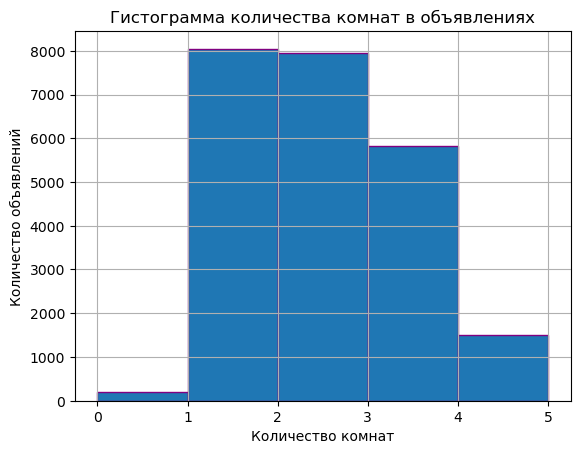

In [43]:
plt.figure(figsize=(10, 3))
news_for_rooms = data.query('rooms < 6').hist(column='rooms', bins=5, ec='purple')
plt.xlabel('Количество комнат')
plt.ylabel('Количество объявлений')
plt.title('Гистограмма количества комнат в объявлениях')
plt.show()

In [44]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,type_locality,cost_for_square,floor_type,first_year,first_month,first_day,day_of_week,range_to_centere_km
0,20,13000.0,108.0,NaT,3,2.70,16.0,51.0,8,NaN,...,755.0,NaN,Город,120370.37,Другой,NaN,NaN,NaN,NaN,16.0
1,7,3350.0,40.4,NaT,1,2.73,11.0,18.6,1,NaN,...,NaN,81.0,Поселок,82920.79,Первый этаж,NaN,NaN,NaN,NaN,19.0
2,10,5196.0,56.0,NaT,2,2.73,5.0,34.3,4,NaN,...,574.0,558.0,Город,92785.71,Другой,NaN,NaN,NaN,NaN,14.0
3,0,64900.0,159.0,NaT,3,2.73,14.0,NaN,9,NaN,...,234.0,424.0,Город,408176.10,Другой,NaN,NaN,NaN,NaN,7.0
4,2,10000.0,100.0,NaT,2,3.03,14.0,32.0,13,NaN,...,48.0,121.0,Город,100000.00,Другой,NaN,NaN,NaN,NaN,8.0


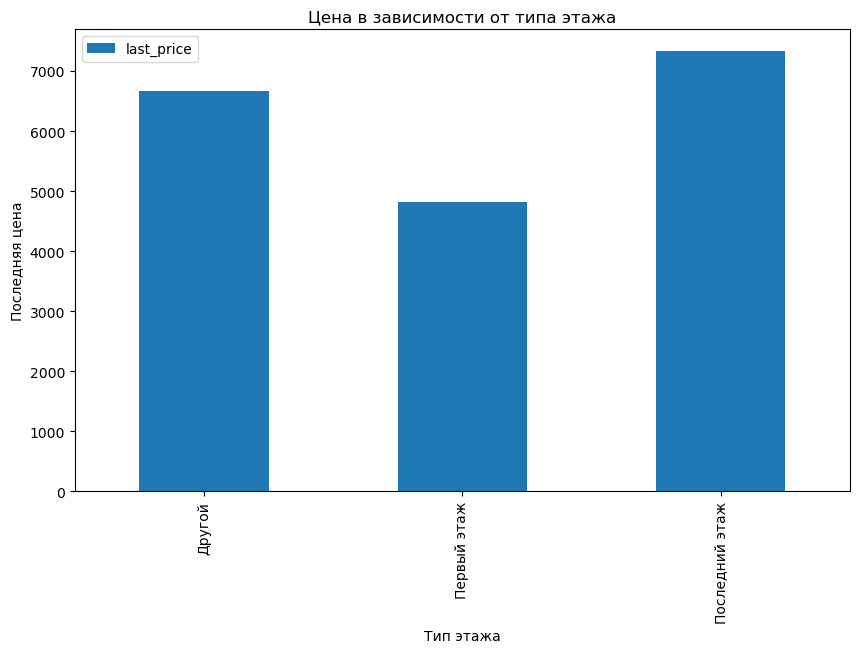

In [45]:
pivot_table_for_floors = data.pivot_table(index='floor_type', values='last_price', aggfunc='mean')

pivot_table_for_floors.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Тип этажа')
plt.ylabel('Последняя цена')
plt.title('Цена в зависимости от типа этажа')
plt.show()

Цены на квартиры на 1ом этаже в среднем на %20 ниже, чем цены на квартиры, расположенные на других этажах, кроме последнего. На последнем этаже, конечно, подороже, чем на 1ом, но дешевле чем на других.

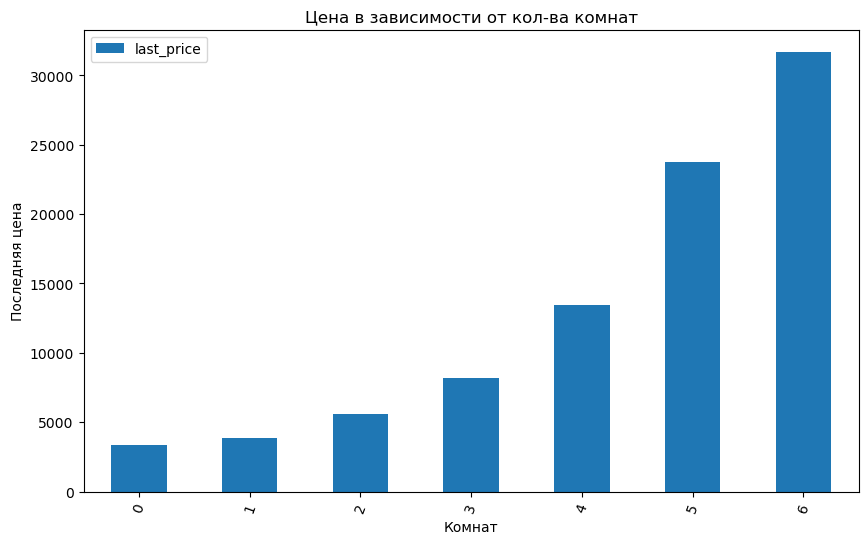

In [46]:
data_srez = data.query('rooms < 7')
pivot_table_for_rooms_in = data_srez.pivot_table(index='rooms', values='last_price', aggfunc='mean')
pivot_table_for_rooms_in.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Комнат')
plt.ylabel('Последняя цена')
plt.title('Цена в зависимости от кол-ва комнат')
plt.xticks(rotation=70)
plt.show()

Всё так. Чем больше комнат, тем выше цена - так продолжается до 7 комнат. Далее - единичные значения (выбросы).

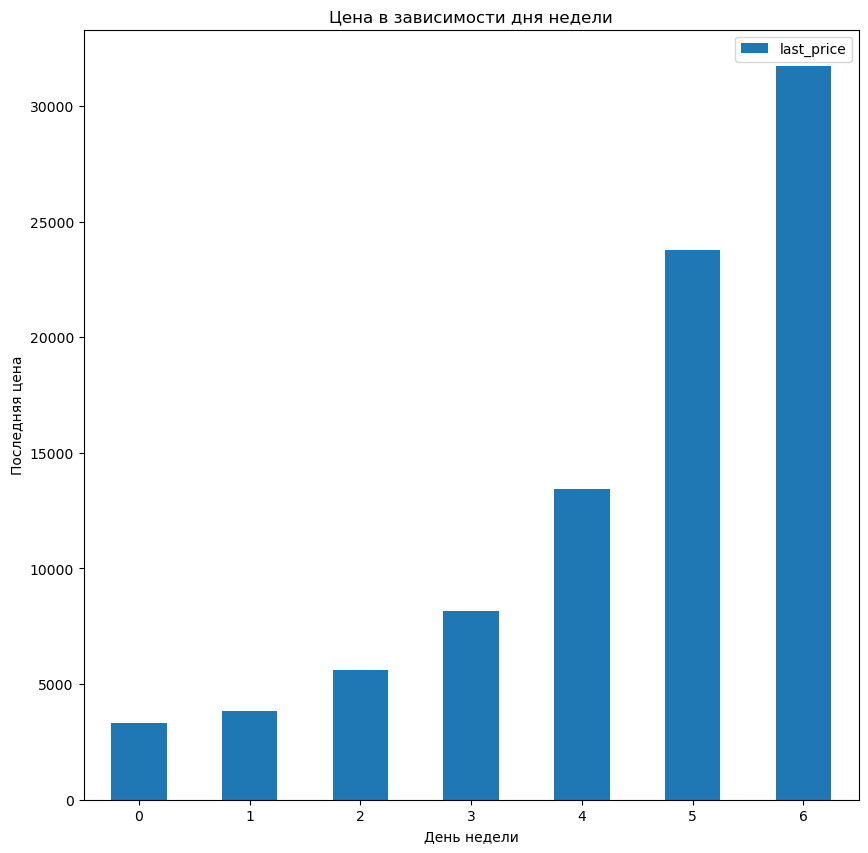

In [51]:
# 0-Понедельник, 1 - вторник и т.д
pivot_table_data_data = data.pivot_table(index='day_of_week', values='last_price', aggfunc='mean')
pivot_table_for_rooms_in.plot(kind='bar', figsize=(10, 10))
plt.xlabel('День недели')
plt.ylabel('Последняя цена')
plt.title('Цена в зависимости дня недели')
plt.xticks(rotation=0)
plt.show()

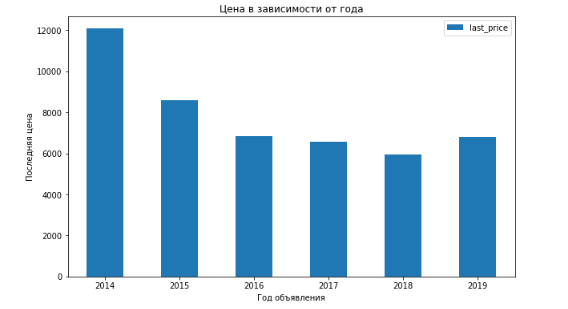

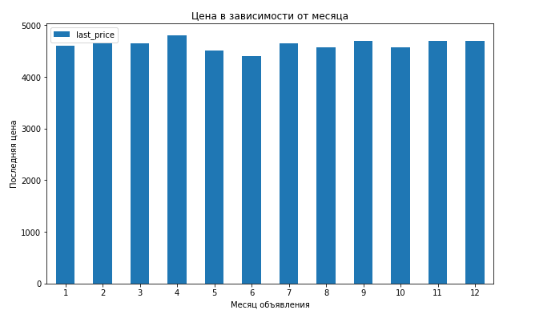

цены на квартиры, чьи объявления о продаже были опубликованы в апреле, выше, чем по остальным месяцам. Особенно выделяется медиана цен на квартиры по июньским объявлениям - довольно низкие в сравнении с другими месяцами  
зависимость цены от года публикации - 2014г. тут очень выделяется.
Исправил на среднее и медиану

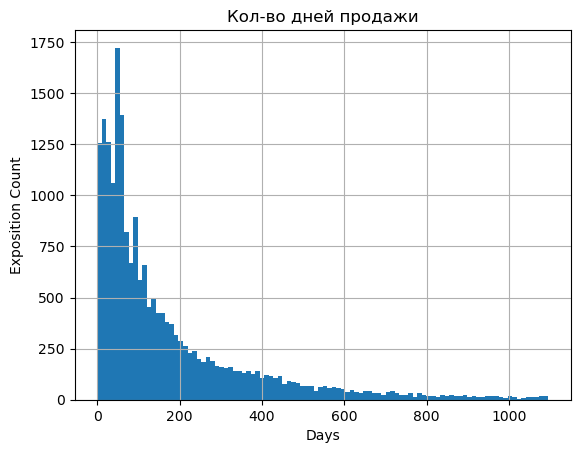

In [52]:
data['days_exposition'].plot(kind='hist', bins=100, range=(0, 1095), grid=True, title='Кол-во дней продажи')
plt.xlabel('Days')
plt.ylabel('Exposition Count')
plt.show()

# Расчет среднего и медианы
mean_exposition = data['days_exposition'].mean()
median_exposition = data['days_exposition'].median()

In [53]:
top_localities = data['locality_name'].value_counts().head(10).index.tolist()
filtered_new_data = data[data['locality_name'].isin(top_localities)]
avg_price_per_sqm = filtered_new_data.groupby('locality_name').agg({'cost_for_square': 'mean', 'locality_name': 'count'})
avg_price_per_sqm = avg_price_per_sqm.rename(columns={'locality_name': 'Название'})
avg_price_per_sqm = avg_price_per_sqm.sort_values(by='cost_for_square', ascending=False)
highest_price_locality = avg_price_per_sqm.index[0]
lowest_price_locality = avg_price_per_sqm.index[-1]
print("Самая высокая стоимость квадратного метра:", highest_price_locality)
print("Самая низкая стоимость квадратного метра:", lowest_price_locality)
avg_price_per_sqm

Самая высокая стоимость квадратного метра: Санкт-Петербург
Самая низкая стоимость квадратного метра: Выборг


,cost_for_square,Название
locality_name,,
Санкт-Петербург,114849.008793,15721
Пушкин,103125.819377,369
деревня Кудрово,92473.547559,299
поселок Парголово,90175.913089,327
поселок Мурино,85681.762572,556
поселок Шушары,78677.364318,440
Колпино,75424.579112,338
Гатчина,68746.146515,307
Всеволожск,68654.473970,398


In [54]:
data['range_to_centere_km']

0        16.0
1        19.0
2        14.0
3         7.0
4         8.0
         ... 
23694     4.0
23695     NaN
23696     NaN
23697    10.0
23698     NaN
Name: range_to_centere_km, Length: 23699, dtype: float64

<Axes: xlabel='range_to_centere_km'>

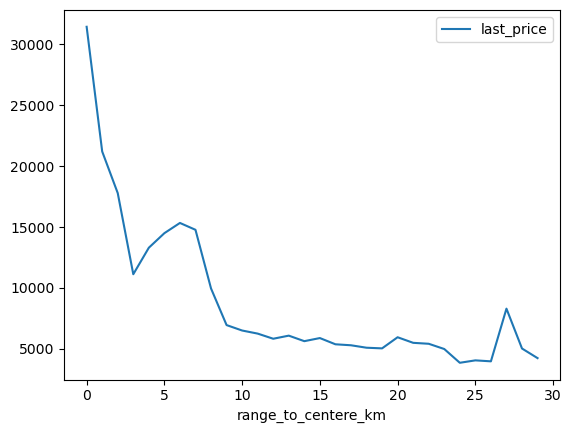

In [55]:
spb_data = data[data['locality_name'] == 'Санкт-Петербург']
avg_price_by_distance = spb_data.groupby('range_to_centere_km').agg({'last_price': 'mean'})
avg_price_by_distance.sort_values(by = 'range_to_centere_km').plot()

Самые дорогие дома в СПБ находятся в центре, прекрасно видно динамику роста цен по отношению к расстоянию. Чем больше цена - тем ближе к центру

Можно наблюдать закономерность растояния до центра и стоимостью квартиры в основном если расстояние до 10 км, то стоимость будет выше нежели расстояние будет больше 10 км, не стоит учитывать расстояние 0 т.к в этих локация попросту нет центра.

### Напишите общий вывод


В среднем, картина одинаковая. С ростом количества комнат в квартире растёт и цена на неё. Но цены объективно выше всего в центре СПб, заметно ниже в пределах СПб, а в области дешевле, чем в городе. Всё ожидаемо. Но 5комнатные квартиры везде в цене.  


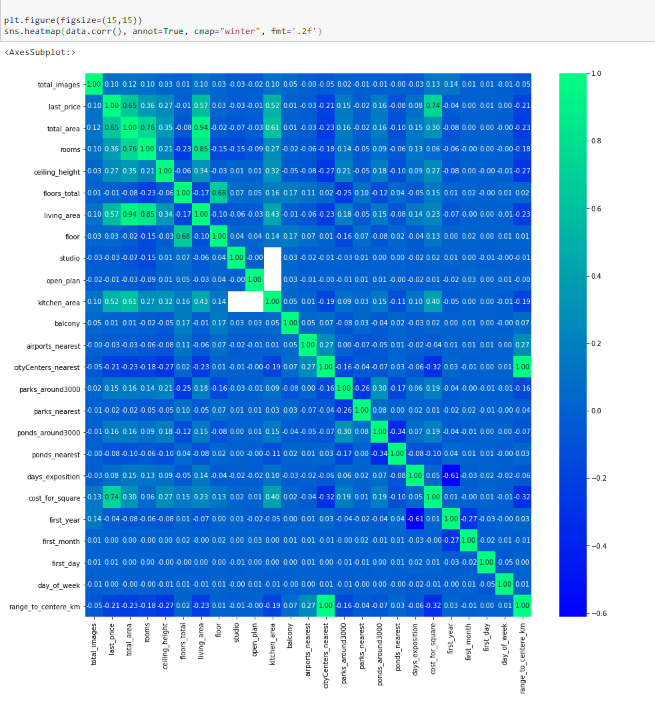

Импорт всех библиотек перенес в начало кода

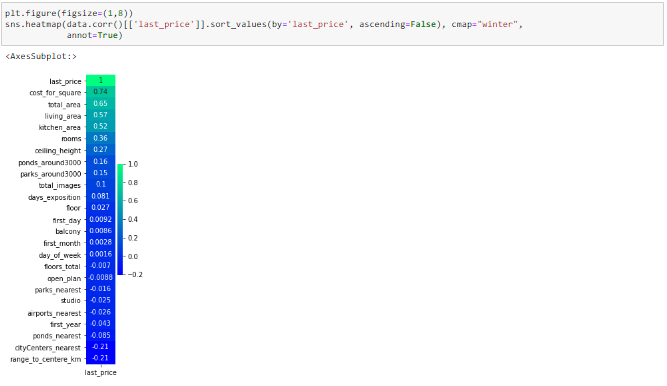

Из данных выше, мы можем сказать, что сильнее всего цена на квартиру зависит от цены за кв.2 , от общей площади квартиры - увеличение площади = увеличение цены, от площади жилой площади и площади кухни, а также от количества комнат. Небольшое влияние оказывает присутствие парков/водоемов рядом.
Также влияние оказывает удаленность от центра - чем дальше от центра, тем ниже цена. Ожидаемо. Таким же образом небольшое влияние оказывает удаленность от аэропорта. Мне кажется можно некоторые значения объединить и будет весьма неплохая зависимость.